In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import glob as gb
import os
import matplotlib.pyplot as plt
#import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
c = 0
x_train = []
y_train = []
class_o = ['Horse', 'Cats', 'Car', 'Airplane']
DIR = r'C:\Users\ELSOUDY\python\my_python\my projects\deep learning\project_1'
for o in class_o:
    path = os.path.join(DIR,o)
    lab  = class_o.index(o)    
    files =gb.glob(pathname=(path +'/*.jpg'))
    #print(files)
    for file in files:
        im = cv.imread(file)
        image  = cv.resize(im,(32,32))
        x_train.append(image)
        y_train.append(lab)
        c+=1
        
cv.destroyAllWindows()
print(c)

185


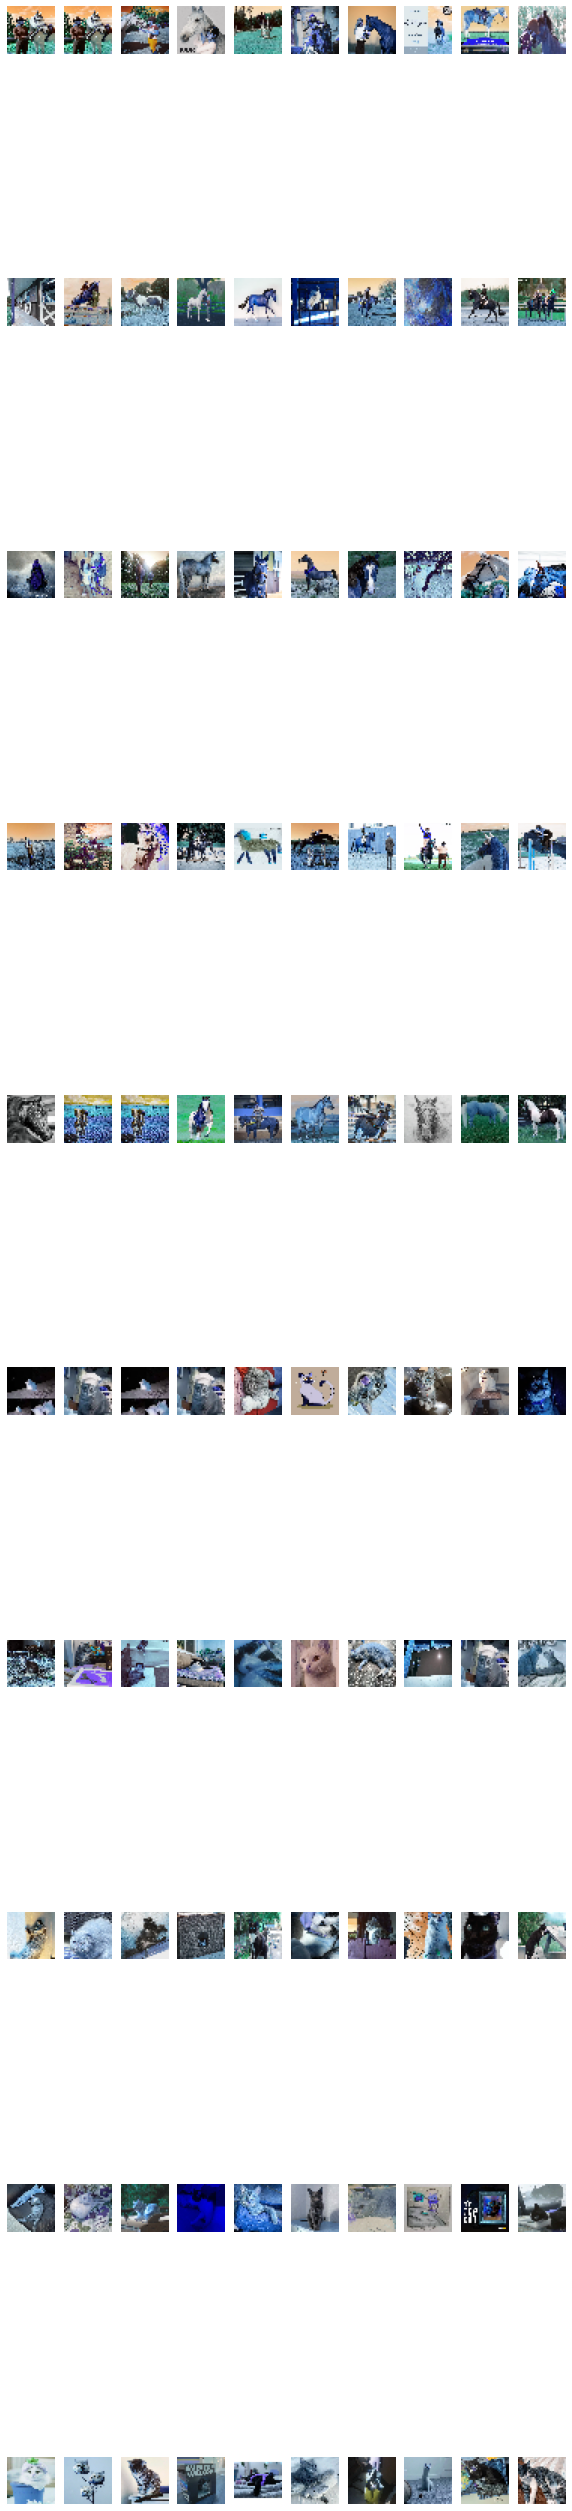

In [4]:
plt.figure(figsize=(10,500))
for i in range(100) : 
    plt.subplot(100,10,i+1)
    plt.imshow(x_train[i])   
    plt.axis('off')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.15)

In [7]:
X_train=np.array(X_train)
X_train.shape

(157, 32, 32, 3)

In [8]:
Y_train=np.array(Y_train)
Y_train.shape

(157,)

In [9]:
Y_test=np.array(Y_test)
Y_test.shape

(28,)

Text(0.5, 0, 'Airplane')

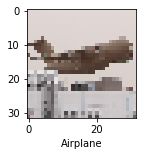

In [10]:
x = 100
plt.figure(figsize = (15,2))
plt.imshow(X_train[x])
plt.xlabel(class_o[Y_train[x]])

In [11]:
X_train = X_train / 255.0


In [12]:
X_test=np.array(X_test)
X_test.shape

(28, 32, 32, 3)

In [13]:
X_test = X_test/ 255.0

In [14]:
cnn = models.Sequential([
                  layers.Conv2D(32, (2,2), activation='relu', input_shape=(32, 32, 3)),
                  layers.MaxPooling2D(3,3),
                  layers.Conv2D(64, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'),
                  layers.MaxPooling2D(2,2),
                  #layers.Conv2D(64, (2, 2), activation='relu'),
                  layers.Conv2D(64, kernel_size=(2,2),activation='relu',kernel_initializer='he_normal'),
                  layers.MaxPooling2D(2,2),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, Y_train, epochs=30)

Epoch 1/30
5/5 [==============================] - 0s 6ms/step - loss: 1.2506 - accuracy: 0.4395
Epoch 2/30
5/5 [==============================] - 0s 6ms/step - loss: 1.1282 - accuracy: 0.4586
Epoch 3/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0770 - accuracy: 0.4586
Epoch 4/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0692 - accuracy: 0.5032
Epoch 5/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0486 - accuracy: 0.4586
Epoch 6/30
5/5 [==============================] - 0s 6ms/step - loss: 1.0255 - accuracy: 0.5478
Epoch 7/30
5/5 [==============================] - 0s 6ms/step - loss: 0.9956 - accuracy: 0.6624
Epoch 8/30
5/5 [==============================] - 0s 6ms/step - loss: 0.9731 - accuracy: 0.4904
Epoch 9/30
5/5 [==============================] - 0s 6ms/step - loss: 0.9315 - accuracy: 0.5860
Epoch 10/30
5/5 [==============================] - 0s 6ms/step - loss: 0.8959 - accuracy: 0.6624
Epoch 11/30
5/5 [======================

In [17]:
cnn.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6429


[0.6752856373786926, 0.6428571343421936]

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

<AxesSubplot:>

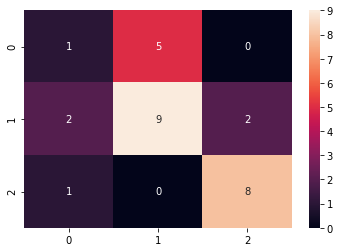

In [19]:
predictions = cnn.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions.argmax(axis=1))
sns.heatmap(cm, annot=True)

In [39]:
model = models.Sequential([
    layers.Conv2D(32, (2,2), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax',kernel_initializer='glorot_normal')
    
    
    
])
#model.add()
#model.add()
#model.add()
#model.add()
#model.add()

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(X_train, Y_train, epochs=15)

Epoch 1/15
5/5 [==============================] - 0s 8ms/step - loss: 0.7864 - accuracy: 0.9809
Epoch 2/15
5/5 [==============================] - 0s 9ms/step - loss: 0.7825 - accuracy: 0.9809
Epoch 3/15
5/5 [==============================] - 0s 9ms/step - loss: 0.7780 - accuracy: 0.9809
Epoch 4/15
5/5 [==============================] - 0s 9ms/step - loss: 0.7750 - accuracy: 0.9809
Epoch 5/15
5/5 [==============================] - 0s 11ms/step - loss: 0.7720 - accuracy: 0.9809
Epoch 6/15
5/5 [==============================] - 0s 10ms/step - loss: 0.7694 - accuracy: 0.9809
Epoch 7/15
5/5 [==============================] - 0s 9ms/step - loss: 0.7654 - accuracy: 0.9873
Epoch 8/15
5/5 [==============================] - 0s 10ms/step - loss: 0.7628 - accuracy: 0.9936
Epoch 9/15
5/5 [==============================] - 0s 10ms/step - loss: 0.7619 - accuracy: 0.9873
Epoch 10/15
5/5 [==============================] - 0s 10ms/step - loss: 0.7593 - accuracy: 0.9936
Epoch 11/15
5/5 [=================

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_train, Y_train))

Epoch 1/15
5/5 [==============================] - 0s 29ms/step - loss: 0.8715 - accuracy: 0.8854 - val_loss: 0.8297 - val_accuracy: 0.9299
Epoch 2/15
5/5 [==============================] - 0s 15ms/step - loss: 0.7831 - accuracy: 0.9745 - val_loss: 0.8313 - val_accuracy: 0.9363
Epoch 3/15
5/5 [==============================] - 0s 14ms/step - loss: 0.7889 - accuracy: 0.9682 - val_loss: 0.7708 - val_accuracy: 0.9873
Epoch 4/15
5/5 [==============================] - 0s 14ms/step - loss: 0.7716 - accuracy: 0.9873 - val_loss: 0.7592 - val_accuracy: 0.9936
Epoch 5/15
5/5 [==============================] - 0s 17ms/step - loss: 0.7566 - accuracy: 1.0000 - val_loss: 0.7561 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 0s 18ms/step - loss: 0.7545 - accuracy: 1.0000 - val_loss: 0.7496 - val_accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 0s 16ms/step - loss: 0.7508 - accuracy: 0.9936 - val_loss: 0.7485 - val_accuracy: 1.0000
Epoch 8/15
5/5 [===========

In [46]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 1000us/step - loss: 1.1605 - accuracy: 0.6071


[1.1605281829833984, 0.6071428656578064]